## Task 1
Calculate for each name in yob2000.txt its percentage of total births. Store this percentage as an additional column.

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('names/yob2000.txt' , names=['name', 'gender', 'count'])

#total births
total = df['count'].sum()

df['percentage'] = df['count'] / total * 100
df

,name,gender,count,percentage
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542
...,...,...,...,...
29771,Zeph,M,5,0.000132
29772,Zeven,M,5,0.000132
29773,Ziggy,M,5,0.000132
29774,Zo,M,5,0.000132


## Task 2
Read all files yob1880.txt, yob1881.txt ... yob2021.txt. Add an extra column for the year. Concatenate them into a single data structure.

In [79]:
import os
import glob
path = os.getcwd()
csv_files = glob.glob(os.path.join('names', "*.txt"))
files = []
for f in csv_files:
    # read the csv file
    df = pd.read_csv(f , names=['name', 'gender', 'count'])
    df['year'] = int(f[9:13])
    files.append(df)

concated = pd.concat(files)

concated

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31532,Zyeire,M,5,2021
31533,Zyel,M,5,2021
31534,Zyian,M,5,2021
31535,Zylar,M,5,2021


## Task 3
Calculate the total number of births for each year. Visualize the timeline as a line plot.

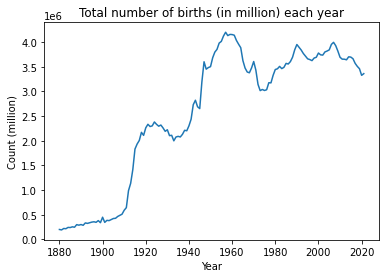

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

total_births = concated.groupby("year")["count"].sum()

# line plot of timeline
total_births.plot(xlabel = "Year",
ylabel = "Count (million)",
kind = "line")
plt.title('Total number of births (in million) each year')
plt.show()

## Task 4
Now, create a timeline for your own name. First check if your name occurs at all. If yes, create a table with the columns year and number.

You may want to sum up the binary genders or choose one. With few exceptions, the influence on the result is tiny.

If your name is not very frequent, there might be missing data for some years. Insert missing data with a 0.

Draw a line plot and label the axes.

       name gender  count  year
109    Sara      F    165  1880
116    Sara      F    147  1881
114    Sara      F    180  1882
117    Sara      F    183  1883
126    Sara      F    197  1884
...     ...    ...    ...   ...
169    Sara      F   1711  2018
162    Sara      F   1740  2019
182    Sara      F   1571  2020
195    Sara      F   1507  2021
29346  Sara      M      6  2021

[227 rows x 4 columns]
year
1880     165
1881     147
1882     180
1883     183
1884     197
        ... 
2017    1885
2018    1711
2019    1740
2020    1571
2021    1513
Name: count, Length: 142, dtype: int64


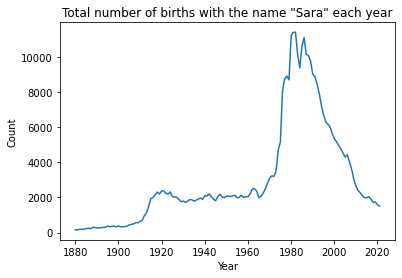

In [108]:
# filling missing data with 0
concated["count"].fillna(0, inplace=True)

# checking if name is there & creating table
sara = concated[concated["name"] == "Sara"]
print(sara)

# timeline of name "Sara"
sara_total = sara.groupby("year")["count"].sum()
print(sara_total)

# line plot of timeline
sara_total.plot(xlabel = "Year",
ylabel = "Count",
kind = "line")
plt.title('Total number of births with the name "Sara" each year')
plt.show()

## Task 5
Investigate the popularity of the names of some US celebrities over the last 130 years. Plot a time line with 2-4 names.

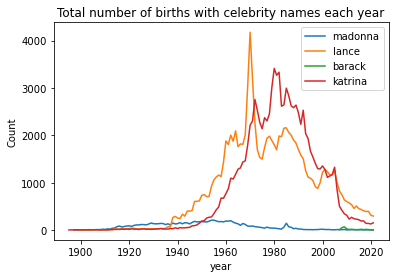

In [132]:
# # checking if name is there & creating table for each
madonna = concated[concated["name"] == "Madonna"]
lance = concated[concated["name"] == "Lance"]
barack = concated[concated["name"] == "Barack"]
katrina = concated[concated["name"] == "Katrina"]

# timeline of celebrity names
madonna = madonna.groupby("year")["count"].sum()
lance = lance.groupby("year")["count"].sum()
barack = barack.groupby("year")["count"].sum()
katrina = katrina.groupby("year")["count"].sum()

# line plot of timeline
ax = madonna.plot(label = "madonna", xlabel = "Year", ylabel = "Count", kind = "line")
lance.plot(label = "lance", ax=ax)
barack.plot(label = "barack", ax=ax)
katrina.plot(label = "katrina" , ax=ax)

plt.legend()
plt.title('Total number of births with celebrity names each year')
plt.show()

## Task 6
Finally, we will normalize the data. Repeat Task 4 or 5, but divide the count of a given name by the total number of births of that year.

How does the result change and why is this important?

year
1880    0.000819
1881    0.000763
1882    0.000813
1883    0.000844
1884    0.000809
          ...   
2017    0.000528
2018    0.000488
2019    0.000503
2020    0.000472
2021    0.000450
Name: count, Length: 142, dtype: float64


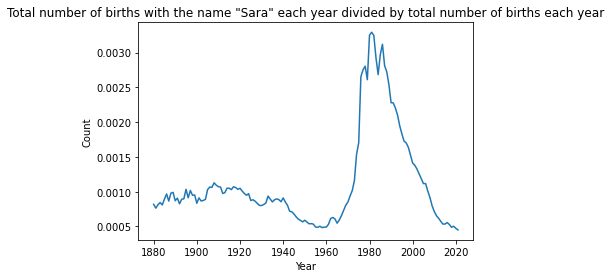

In [138]:
# timeline of name "Sara divided by total number of births"
sara_total2 = sara.groupby("year")["count"].sum()/total_births
print(sara_total2)

# line plot of timeline
sara_total2.plot(xlabel = "Year",
ylabel = "Count",
kind = "line")
plt.title('Total number of births with the name "Sara" each year divided by total number of births each year')
plt.show()

The graph has a similar shape/looks similar but scaled down.